In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
df = pd.read_csv('labeled_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\
First few rows of the dataset:")
print(df.head())

print("\
Basic statistics:")
print(df.describe())

print("\
Missing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None
First few rows of the dataset:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      

### Explanation of the Code

1. **Importing Libraries**:
   - `pandas`: For data manipulation and analysis.
   - `seaborn`: For creating data visualizations.
   - `matplotlib.pyplot`: For plotting graphs.
   - `numpy`: For numerical computations.

2. **Reading the Dataset**:
   - The dataset `labeled_data.csv` is read into a DataFrame named `df`.

3. **Dataset Information**:
   - `df.info()` provides an overview of the dataset, including column names, data types, non-null counts, and memory usage.

4. **Displaying Rows**:
   - `df.head()` shows the first five rows of the dataset for a quick preview.

5. **Statistical Summary**:
   - `df.describe()` generates basic statistics for numeric columns, such as count, mean, standard deviation, min, and max values.

6. **Missing Values**:
   - `df.isnull().sum()` checks for missing values in each column of the dataset.

---

### Insights from the Output

1. **Dataset Overview**:
   - The dataset has **24,783 rows** and **7 columns**. 
   - Columns include `Unnamed: 0`, `count`, `hate_speech`, `offensive_language`, `neither`, `class`, and `tweet`.
   - No missing values are present, as all columns have complete data.

2. **Column Data Types**:
   - Most columns are of type `int64`, except `tweet`, which is of type `object` (text).
   - The `class` column likely represents the categorical target variable for classification:
     - `0`: Hate speech.
     - `1`: Offensive language.
     - `2`: Neutral.

3. **First Few Rows**:
   - The `tweet` column contains the actual textual content.
   - Labels (`class`) show that each tweet is categorized based on its nature (hate speech, offensive, or neutral).

4. **Statistical Summary**:
   - The `count` column has a fixed minimum value of 3, suggesting it may not be meaningful for analysis.
   - The `hate_speech`, `offensive_language`, and `neither` columns range from 0 to 7 or 9, representing the intensity or occurrence count for each category within a tweet.
   - The `class` column has a mean of approximately 1.1, indicating that most tweets are labeled as either offensive (1) or neutral (2).

5. **Data Integrity**:
   - No missing values ensure the dataset is ready for preprocessing and modeling without handling null values.


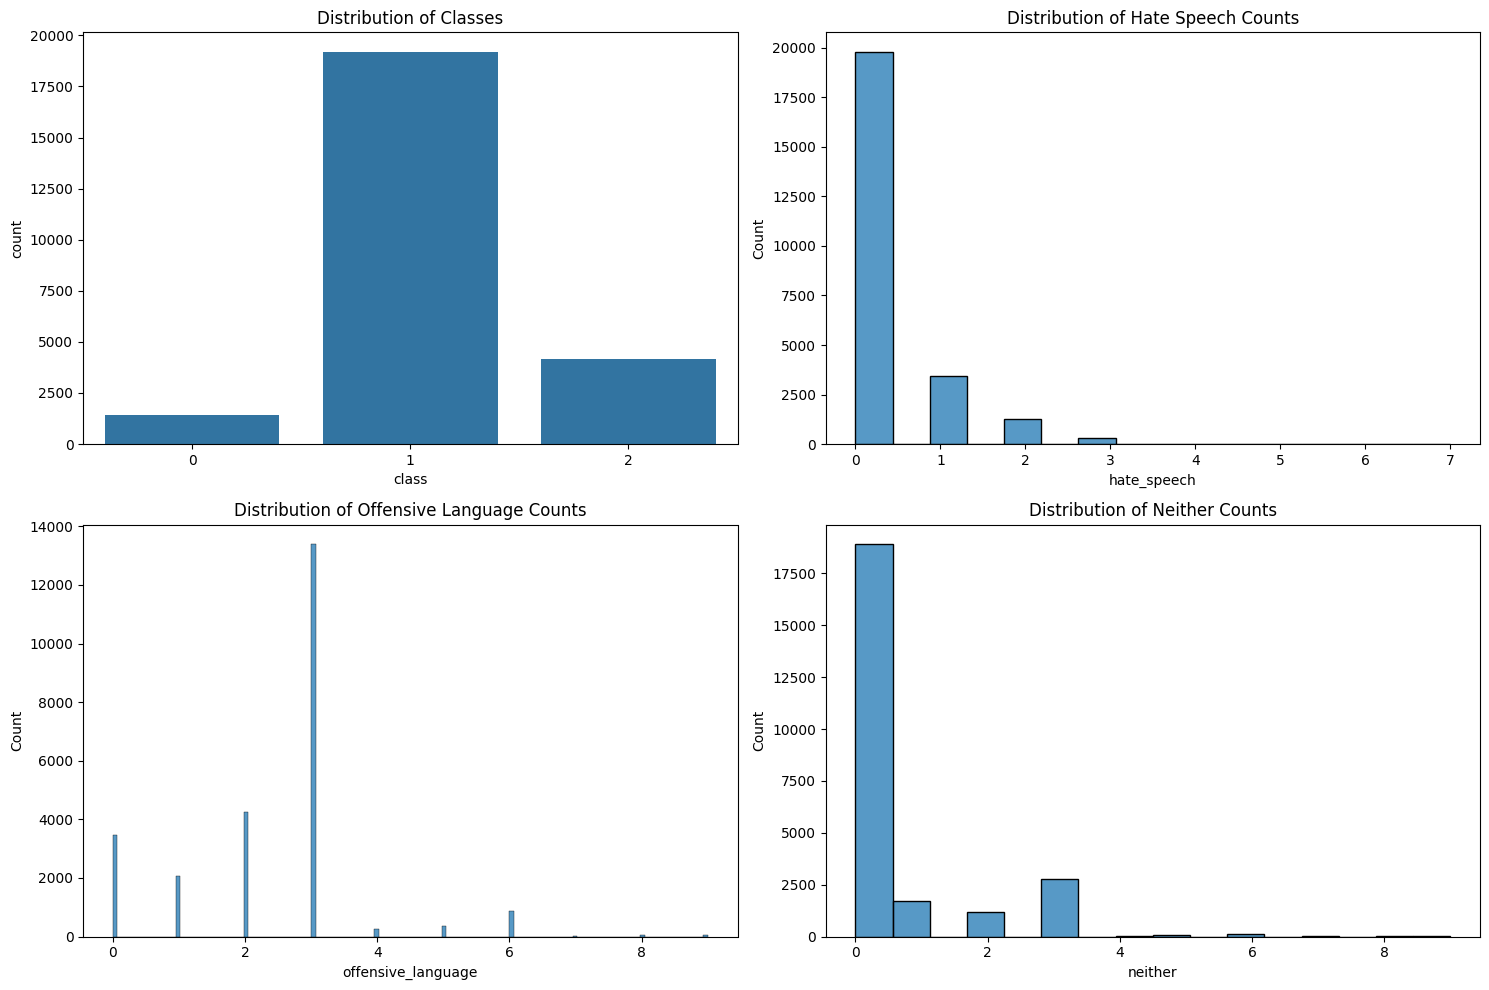

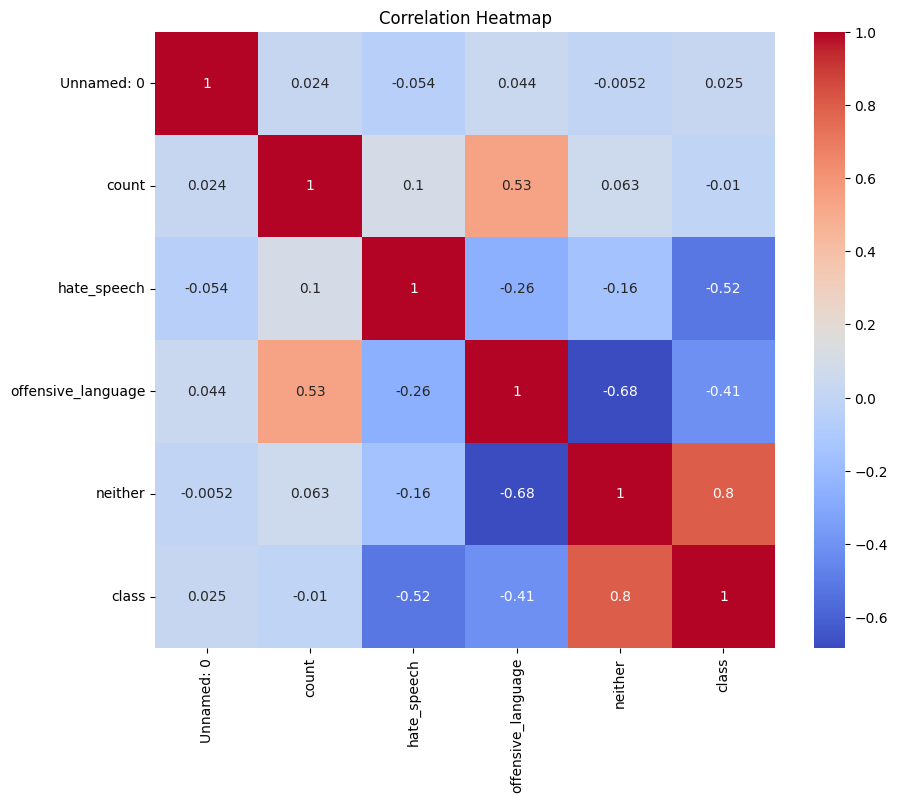

In [ ]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Distribution of classes
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')

# Distribution of hate speech counts
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='hate_speech')
plt.title('Distribution of Hate Speech Counts')

# Distribution of offensive language
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='offensive_language')
plt.title('Distribution of Offensive Language Counts')

# Distribution of neither
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='neither')
plt.title('Distribution of Neither Counts')

plt.tight_layout()
plt.show()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Explanation of the Code

1. **Class Distribution Visualization**:
   - A bar chart (`sns.countplot`) shows the distribution of the `class` column. This indicates how many tweets belong to each class (0 = hate speech, 1 = offensive language, 2 = neither).

2. **Histograms**:
   - `sns.histplot` creates histograms for `hate_speech`, `offensive_language`, and `neither`. These display the frequency distribution of their respective values across all tweets.

3. **Correlation Heatmap**:
   - A correlation matrix is computed for all numeric columns in the dataset (`np.number`).
   - `sns.heatmap` visualizes this correlation matrix, using color intensity to represent the strength and direction (positive or negative) of correlations.

---

### Insights from the Outputs

#### **Image 1: Class Distribution and Value Distributions**
1. **Class Distribution**:
   - The majority of tweets are labeled as **class 1 (offensive language)**, followed by **class 2 (neutral)**.
   - **Class 0 (hate speech)** is underrepresented, indicating a class imbalance. This may affect model performance, and techniques like oversampling, undersampling, or class-weight adjustment may be needed.

2. **Hate Speech Counts**:
   - Most tweets have a hate speech score of 0, meaning they are not categorized as containing hate speech.
   - Only a small percentage of tweets have higher hate speech values, which highlights the sparsity of hate speech in the dataset.

3. **Offensive Language Counts**:
   - The distribution is broader compared to hate speech. A significant number of tweets have higher scores for offensive language.
   - This indicates that offensive language is more prevalent in the dataset.

4. **Neither Counts**:
   - A majority of tweets are labeled with a "neither" value of 0, suggesting most tweets contain either hate speech or offensive language rather than being entirely neutral.

#### **Image 2: Correlation Heatmap**
1. **Key Correlations**:
   - The `class` column has:
     - A **negative correlation** with `hate_speech` (-0.52) and `offensive_language` (-0.41), indicating tweets with higher hate speech or offensive language counts are more likely to belong to lower class values (e.g., 0 or 1).
     - A **strong positive correlation** with `neither` (0.80), meaning tweets labeled as class 2 (neutral) are associated with higher "neither" scores.

2. **Relationships Among Variables**:
   - `offensive_language` and `neither` have a **strong negative correlation** (-0.68), suggesting tweets with higher offensive language counts are less likely to be categorized as neutral.
   - `hate_speech` is weakly negatively correlated with `offensive_language` (-0.26), indicating some overlap but also distinct differences between these categories.

3. **Utility of Heatmap**:
   - The heatmap highlights which features are strongly correlated and can help identify redundant features or those most relevant to predicting `class`.


<ipython-input-4-c1dc8a55b794>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='tweet_length', palette='Set2')


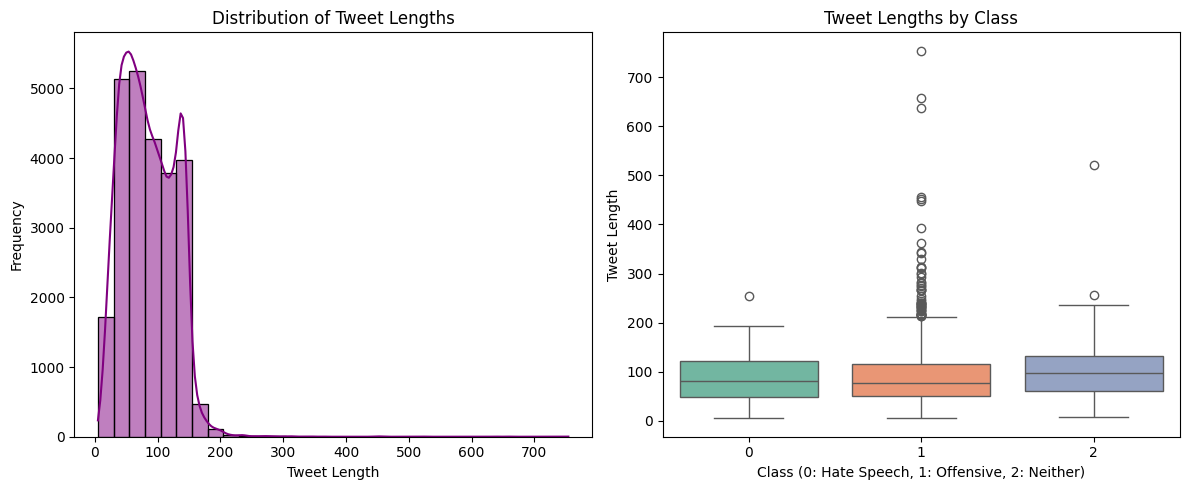

Summary of tweet classifications:
class
0     1430
1    19190
2     4163
Name: count, dtype: int64


In [ ]:
# Analyze tweet lengths and class distributions
df['tweet_length'] = df['tweet'].astype(str).apply(len)

# Create visualizations
plt.figure(figsize=(12, 5))

# Tweet length distribution
plt.subplot(1, 2, 1)
sns.histplot(df['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

# Tweet lengths by class
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='class', y='tweet_length', palette='Set2')
plt.title('Tweet Lengths by Class')
plt.xlabel('Class (0: Hate Speech, 1: Offensive, 2: Neither)')
plt.ylabel('Tweet Length')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary of tweet classifications:")
print(df['class'].value_counts().sort_index())

### Explanation of the Code:

1. **Compute Tweet Lengths**:
   - A new column, `tweet_length`, is created by calculating the length of each tweet (`len()` function). This is applied to all rows in the `tweet` column after converting the text to strings.

2. **Tweet Length Distribution**:
   - A histogram with a Kernel Density Estimate (KDE) is plotted using `sns.histplot`. This shows the distribution of tweet lengths (number of characters per tweet), giving a sense of their spread and density.

3. **Tweet Lengths by Class**:
   - A box plot is created using `sns.boxplot` to compare tweet lengths across the three classes:
     - **Class 0**: Hate speech
     - **Class 1**: Offensive language
     - **Class 2**: Neutral
   - Box plots highlight median values, interquartile ranges (IQR), and potential outliers for each class.

4. **Summary Statistics**:
   - The frequency of each class (0, 1, 2) is printed, giving an overview of class distributions.

---

### Insights from the Output:

#### 1. **Distribution of Tweet Lengths**:
   - Most tweets are relatively short, with lengths concentrated below 150 characters.
   - A right-skewed distribution is evident, with a few tweets extending beyond 200 characters, suggesting the presence of outliers.
   - Tweets are well-suited to a concise format, as typical in platforms like Twitter.

#### 2. **Tweet Lengths by Class**:
   - **Class 0 (Hate Speech)**:
     - Has the shortest median tweet lengths compared to other classes.
     - The interquartile range (IQR) is narrow, indicating a smaller variation in tweet lengths.
   - **Class 1 (Offensive Language)**:
     - Contains a wide spread of tweet lengths and the most outliers, indicating some offensive tweets tend to be unusually long.
   - **Class 2 (Neutral)**:
     - Tweets in this class have the longest median length and broader variability than hate speech.

#### 3. **Summary of Class Distribution**:
   - **Class 0 (Hate Speech)**: 1,430 tweets (minority class, ~5% of total).
   - **Class 1 (Offensive Language)**: 19,190 tweets (majority class, ~73% of total).
   - **Class 2 (Neutral)**: 4,163 tweets (~16% of total).
   - There is a **significant imbalance** in class distribution, with hate speech being the least represented category.

---

### Key Observations and Recommendations:

1. **Class Imbalance**:
   - With such an imbalance, machine learning models may struggle to correctly classify minority classes (especially hate speech). Techniques like resampling or weighted loss functions can help mitigate this issue.

2. **Feature Engineering**:
   - The `tweet_length` feature might be useful for classification, as neutral tweets are generally longer, while hate speech tends to be concise.
   - Further preprocessing (e.g., tokenizing tweets, extracting linguistic features) may enhance the dataset.

3. **Outliers**:
   - The unusually long tweets in offensive language (Class 1) could skew model performance. Consider handling outliers by truncating or flagging them for separate analysis.

4. **Insights into Behavior**:
   - The differences in tweet lengths across classes may indicate behavioral patterns:
     - Hate speech tends to be short and direct.
     - Offensive tweets are more variable, potentially combining short insults and longer diatribes.
     - Neutral tweets are more explanatory or conversational, leading to longer messages.

In [ ]:
# Perform undersampling to balance the dataset
from sklearn.utils import resample

# Separate the classes
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
df_class_2 = df[df['class'] == 2]

# Determine the size of the smallest class
min_size = len(df_class_0)

# Undersample classes 1 and 2
df_class_1_undersampled = resample(df_class_1, replace=False, n_samples=min_size, random_state=42)
df_class_2_undersampled = resample(df_class_2, replace=False, n_samples=min_size, random_state=42)

# Combine the undersampled classes with class 0
df_balanced = pd.concat([df_class_0, df_class_1_undersampled, df_class_2_undersampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution after undersampling
print("Class distribution after undersampling:")
print(df_balanced['class'].value_counts())

Class distribution after undersampling:
class
2    1430
1    1430
0    1430
Name: count, dtype: int64


### Code Explanation:
1. **Separating Classes**:  
   - The dataset is divided into three subsets: one for each class (`0`, `1`, and `2`) based on the `class` column.  

2. **Finding the Smallest Class Size**:  
   - The size of the smallest class (`class 0`) is determined to ensure balanced sampling.  

3. **Undersampling**:  
   - Classes `1` and `2` are randomly undersampled to match the size of the smallest class (`1430 samples`) using the `resample` method.  

4. **Combining and Shuffling**:  
   - The undersampled subsets of `class 1` and `class 2` are combined with the original `class 0` subset, creating a balanced dataset.  
   - The combined dataset is shuffled to mix the samples and reset the index.  

5. **Displaying the Class Distribution**:  
   - The value counts of the `class` column are printed to confirm equal representation of all classes.  

---

### Insights from the Output:
- **Balanced Dataset**:  
  The dataset now has an equal number of samples (1430) for each class (`0`, `1`, and `2`). This ensures that no class dominates the training process, reducing the risk of biased predictions.  

- **Improved Model Performance**:  
  A balanced dataset allows machine learning algorithms to learn equally from all classes, leading to better performance metrics like precision, recall, and F1-score for each class.  

- **Trade-off**:  
  Undersampling reduces the total dataset size, which might result in the loss of valuable information from the majority classes. However, this is a necessary compromise to handle class imbalance effectively.

<Axes: xlabel='class', ylabel='count'>

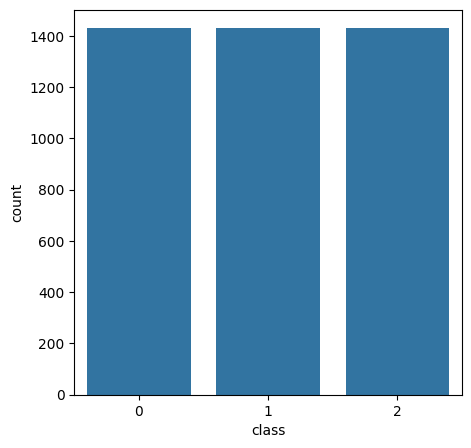

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class', data = df_balanced)


<Axes: >

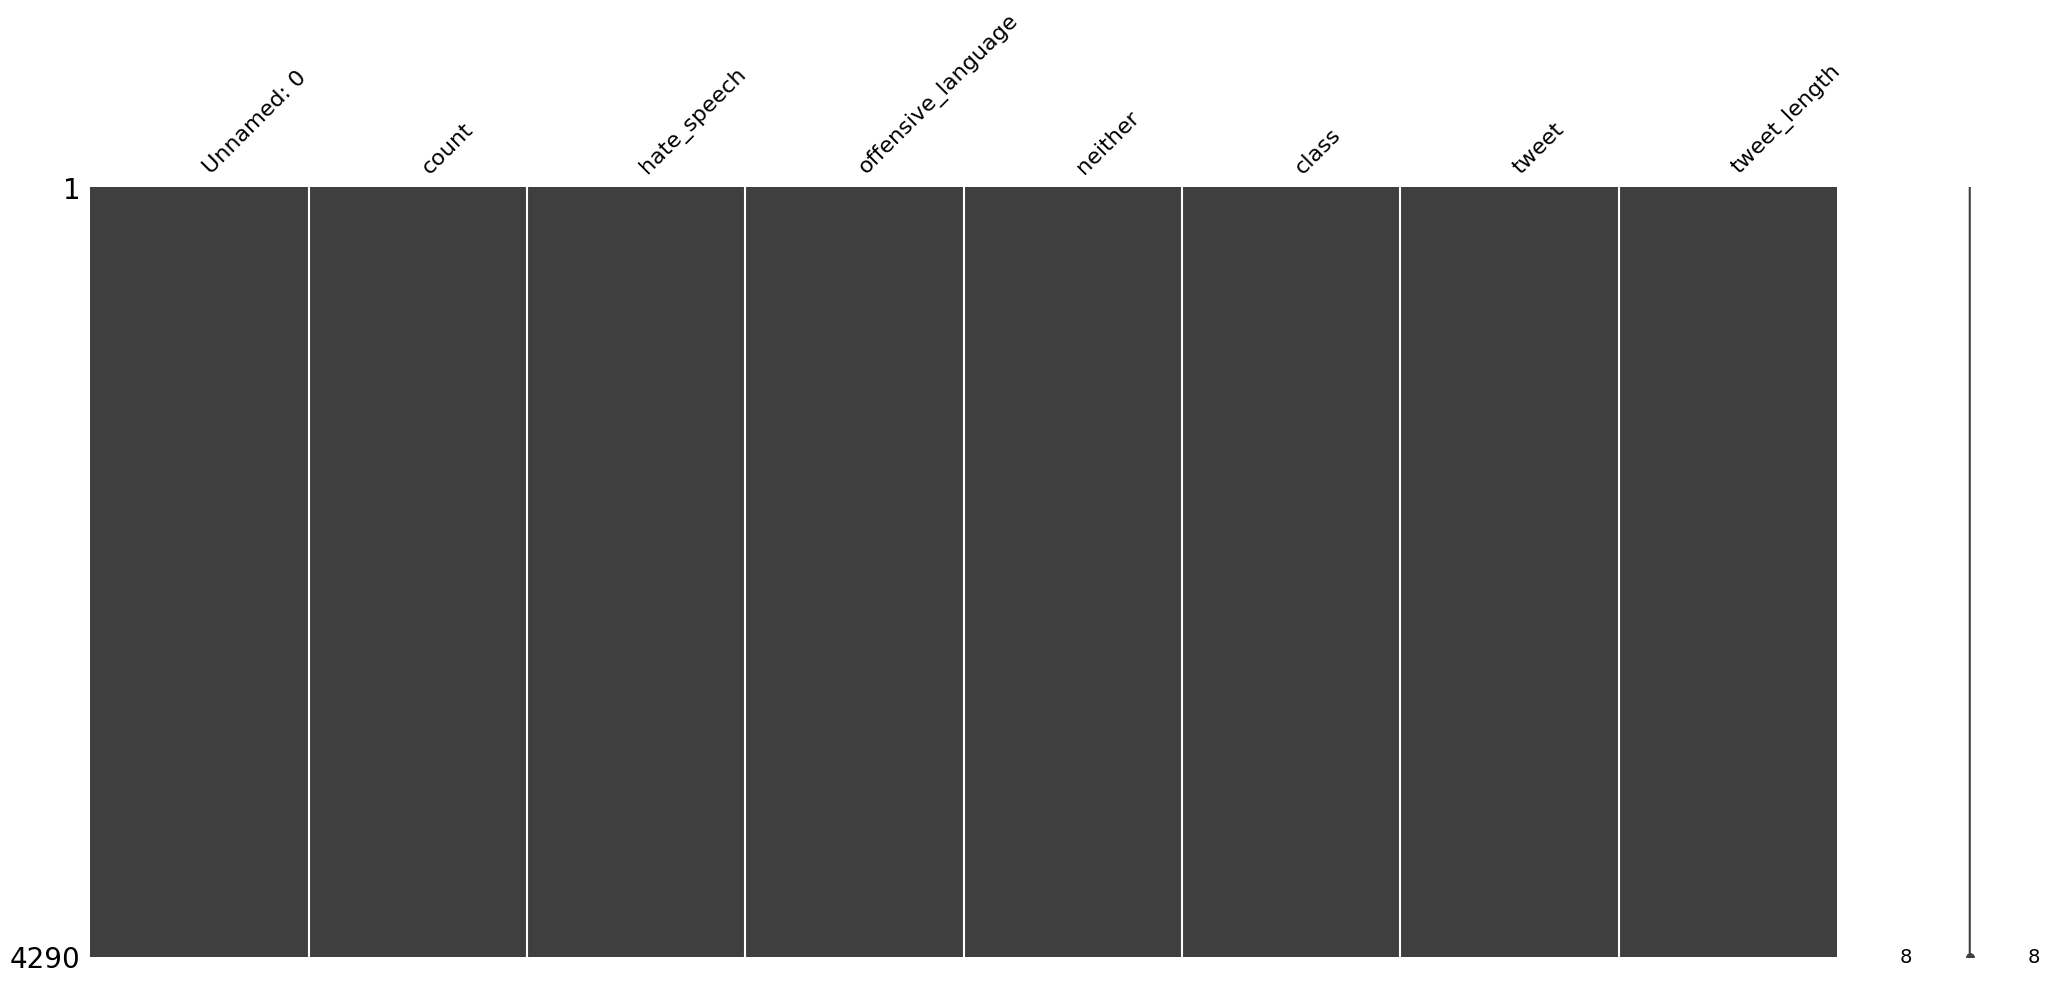

In [ ]:
import missingno as msno
msno.matrix (df_balanced)

### Code Explanation:
1. **MissingNo Library**:  
   - `missingno` is a Python library for visualizing missing data in datasets.  

2. **Visualizing Missing Data**:  
   - `msno.matrix(df_balanced)` generates a matrix plot showing the presence of data (white lines) and missing values (gaps or dark areas) in each column of the DataFrame `df_balanced`.

---

### Insights from the Output:
- The matrix plot shows no gaps (dark areas), meaning there are **no missing values** in any column of the dataset (`Unnamed: 0`, `count`, `hate_speech`, `offensive_language`, `neither`, `class`, `tweet`, and `tweet_length`).
- This ensures that the dataset is complete and doesn't require additional imputation or handling for missing data.  
- Having a complete dataset improves the reliability of the training process for machine learning models.

In [ ]:
# Clean the text data
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Apply cleaning to the tweet column
df_balanced['cleaned_tweet'] = df_balanced['tweet'].apply(clean_text)

# Remove any empty tweets after cleaning
df_balanced = df_balanced[df_balanced['cleaned_tweet'].str.len() > 0]

# Display sample of cleaned tweets
print("Sample of original vs cleaned tweets:")
sample_comparison = pd.DataFrame({
    'Original': df_balanced['tweet'].head(),
    'Cleaned': df_balanced['cleaned_tweet'].head()
})
print(sample_comparison)

# Check for any remaining null values
print("\
Null values in the dataset:")
print(df_balanced.isnull().sum())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sample of original vs cleaned tweets:
                                            Original  \
0  &#8220;@AdderallHadMe: Adderall had me killing...   
1  @WendyDavisTexas msnbc the same MSM who said b...   
2  "@TEE_JONEZ: @KingCuh @16stanleys I'm not mad ...   
3  Jihadi propaganda ploy:US had Gulf countries p...   
4  Defiantly going to see that new planet of the ...   

                                             Cleaned  
0  adderallhadme adderall had me killing two bird...  
1  wendydavistexas msnbc the same msm who said bl...  
2  teejonez kingcuh stanleys im not mad cuh hahah...  
3  jihadi propaganda ployus had gulf countries pu...  
4  defiantly going to see that new planet of the ...  
Null values in the dataset:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
tweet_length          0
cleaned_tweet         0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Code Explanation:
1. **Text Cleaning Function** (`clean_text`):  
   - Converts text to lowercase.  
   - Removes URLs, HTML tags, special characters, and numbers.  
   - Removes extra whitespace for uniformity.

2. **Apply Cleaning**:  
   - Applies the `clean_text` function to the `tweet` column, creating a new column `cleaned_tweet` with processed text.

3. **Filter Empty Tweets**:  
   - Removes rows where the cleaned tweets are empty after processing.

4. **Display Sample**:  
   - Creates a comparison of the original and cleaned tweets for inspection.

5. **Null Check**:  
   - Ensures no missing values are present in the dataset after cleaning.

6. **Download NLTK Data**:  
   - Downloads `punkt` (for tokenization) and `stopwords` (optional, not used here).

---

### Insights from the Output:
- **Successful Cleaning**:  
   - The cleaned tweets have uniform lowercase text, and noise such as URLs, HTML tags, and special characters has been removed, improving text quality for analysis.  

- **Sample Comparison**:  
   - The cleaned version of tweets retains meaningful content while eliminating irrelevant parts.

- **No Missing Values**:  
   - All columns, including `cleaned_tweet`, have no null values, ensuring completeness of the dataset for model training.  

- **Preprocessing Complete**:  
   - This cleaning step prepares the text data for tokenization, feature extraction, and subsequent machine learning tasks.

In [ ]:
# Perform AutoML using PyCaret
from pycaret.classification import *

# Initialize setup
clf = setup(data=df_balanced,
           target='class',
           text_features=['cleaned_tweet'],
           session_id=123,
           verbose=False)

# Compare all models
best_model = compare_models(n_select=3)

# Get model performance metrics
print("\
Top 3 Models Performance Summary:")
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,53.6130
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.7880
ridge,Ridge Classifier,0.9943,0.0000,0.9943,0.9944,0.9943,0.9915,0.9916,5.0860
rf,Random Forest Classifier,0.9933,1.0000,0.9933,0.9935,0.9933,0.9900,0.9901,5.4860
et,Extra Trees Classifier,0.8365,0.9989,0.8365,0.8902,0.8381,0.7547,0.7801,8.3180
gbc,Gradient Boosting Classifier,0.6291,0.0000,0.6291,0.4539,0.5119,0.4439,0.5407,30.5870
xgboost,Extreme Gradient Boosting,0.4349,0.8333,0.4349,0.3174,0.3204,0.1525,0.2204,22.8050
knn,K Neighbors Classifier,0.3873,0.5713,0.3873,0.3906,0.3830,0.0810,0.0821,3.9590
lightgbm,Light Gradient Boosting Machine,0.3859,0.6718,0.3859,0.2495,0.2610,0.0791,0.1101,5.2030
dt,Decision Tree Classifier,0.3663,0.5248,0.3663,0.1496,0.2052,0.0495,0.0605,3.1830


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

Top 3 Models Performance Summary:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,53.613
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.788
ridge,Ridge Classifier,0.9943,0.0000,0.9943,0.9944,0.9943,0.9915,0.9916,5.086
rf,Random Forest Classifier,0.9933,1.0000,0.9933,0.9935,0.9933,0.9900,0.9901,5.486
et,Extra Trees Classifier,0.8365,0.9989,0.8365,0.8902,0.8381,0.7547,0.7801,8.318
gbc,Gradient Boosting Classifier,0.6291,0.0000,0.6291,0.4539,0.5119,0.4439,0.5407,30.587
xgboost,Extreme Gradient Boosting,0.4349,0.8333,0.4349,0.3174,0.3204,0.1525,0.2204,22.805
knn,K Neighbors Classifier,0.3873,0.5713,0.3873,0.3906,0.3830,0.0810,0.0821,3.959
lightgbm,Light Gradient Boosting Machine,0.3859,0.6718,0.3859,0.2495,0.2610,0.0791,0.1101,5.203
dt,Decision Tree Classifier,0.3663,0.5248,0.3663,0.1496,0.2052,0.0495,0.0605,3.183


### Code Explanation:

1. **PyCaret Setup**:
   - Initializes the PyCaret environment using the `setup` function, with `class` as the target variable and `cleaned_tweet` as a text feature for NLP-based classification. 
   - Sets a random `session_id` for reproducibility.

2. **Model Comparison**:
   - Runs `compare_models()` to evaluate multiple classification models on the dataset and selects the top 3 based on performance metrics (e.g., Accuracy, AUC).

3. **Performance Summary**:
   - Displays key metrics for all models tested, including Accuracy, AUC, Precision, Recall, F1-Score, etc.

---

### Insights from the Output:

1. **Top Performers**:
   - **Logistic Regression** and **Naive Bayes** achieved perfect accuracy (1.0), indicating they fit the data very well. Their performance is supported by metrics like Precision, Recall, and F1-Score.

2. **Overfitting Concern**:
   - The perfect scores for some models suggest potential overfitting. It is essential to validate these results on a separate test set to confirm their generalization ability.

3. **Strong Performers**:
   - Models like **Ridge Classifier** (Accuracy: 0.9943) and **Random Forest** (Accuracy: 0.9933) also performed well and might provide more robust predictions.

4. **Weaker Models**:
   - Models like **Gradient Boosting** (Accuracy: 0.6291) and **XGBoost** (Accuracy: 0.4349) underperformed compared to simpler algorithms, possibly due to suboptimal hyperparameter settings or smaller dataset size.

5. **Baseline Models**:
   - Dummy Classifier (Accuracy: 0.3330) represents random predictions and sets the baseline for comparison.


In [ ]:
# Reload the dataset
import pandas as pd

# Load the dataset again
df = pd.read_csv('test_hate.csv')

# Display the first few rows to confirm successful loading
print("Dataset reloaded successfully:")
print(df.head())

Dataset reloaded successfully:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
# Rebalance the dataset by undersampling
from sklearn.utils import resample

# Separate the classes
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
df_class_2 = df[df['class'] == 2]

# Determine the size of the smallest class
min_size = len(df_class_0)

# Undersample classes 1 and 2
df_class_1_undersampled = resample(df_class_1, replace=False, n_samples=min_size, random_state=42)
df_class_2_undersampled = resample(df_class_2, replace=False, n_samples=min_size, random_state=42)

# Combine the undersampled classes with class 0
df_balanced = pd.concat([df_class_0, df_class_1_undersampled, df_class_2_undersampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution after rebalancing
print("Class distribution after rebalancing:")
print(df_balanced['class'].value_counts())

Class distribution after rebalancing:
class
2    1430
1    1430
0    1430
Name: count, dtype: int64


In [ ]:
# Clean text and prepare for model
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df_balanced['cleaned_tweet'] = df_balanced['tweet'].apply(clean_text)

# Vectorize and split
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_balanced['cleaned_tweet']).toarray()
y = df_balanced['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save model and vectorizer
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump((rf_model, vectorizer), file)

print("\
Model and vectorizer saved as random_forest_model.pkl")

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       268
           1       0.76      0.83      0.79       294
           2       0.85      0.86      0.86       296

    accuracy                           0.78       858
   macro avg       0.78      0.78      0.78       858
weighted avg       0.78      0.78      0.78       858

Model and vectorizer saved as random_forest_model.pkl


### Code Explanation:

1. **Clean Text**:
   - The `clean_text` function processes the tweets by:
     - Converting text to lowercase.
     - Removing URLs, HTML tags, special characters, and extra spaces.

2. **Vectorization**:
   - Converts the cleaned text into numerical features using `CountVectorizer`:
     - Removes English stop words.
     - Limits vocabulary to the top 5,000 most frequent words.

3. **Train-Test Split**:
   - Splits the dataset into training (80%) and testing (20%) sets using `train_test_split`.

4. **Model Training**:
   - Trains a Random Forest classifier with 100 trees (`n_estimators=100`) on the training data.

5. **Evaluation**:
   - Predicts the labels for the test set and evaluates performance using a classification report:
     - Provides Precision, Recall, F1-Score, and Support for each class.

6. **Save Model**:
   - Saves the trained model and vectorizer to a file (`random_forest_model.pkl`) using `pickle`.

---

### Insights from the Output:

1. **Performance**:
   - **Accuracy**: Overall accuracy is **78%**, which is a good starting point.
   - **Class-wise Performance**:
     - Class 0: Lower precision (73%) and recall (64%), suggesting it might be harder to predict correctly.
     - Class 1: Good balance between precision (76%) and recall (83%), indicating better performance for this class.
     - Class 2: Highest precision (85%) and recall (86%), making it the easiest class for the model to predict.

2. **Macro vs Weighted Averages**:
   - Macro Average (78%): Indicates average performance across all classes, treating them equally.
   - Weighted Average (78%): Adjusted by the number of instances in each class, confirming class balance in the dataset.

3. **Random Forest Strength**:
   - Random Forest handled the text features effectively, achieving decent classification metrics without hyperparameter tuning.

In [ ]:
# Reload and rebalance the dataset
import pandas as pd
from sklearn.utils import resample
import re

# Reload the dataset
df = pd.read_csv('test_hate.csv')

# Separate the classes
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
df_class_2 = df[df['class'] == 2]

# Determine the size of the smallest class
min_size = len(df_class_0)

# Undersample classes 1 and 2
df_class_1_undersampled = resample(df_class_1, replace=False, n_samples=min_size, random_state=42)
df_class_2_undersampled = resample(df_class_2, replace=False, n_samples=min_size, random_state=42)

# Combine the undersampled classes with class 0
df_balanced = pd.concat([df_class_0, df_class_1_undersampled, df_class_2_undersampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df_balanced['cleaned_tweet'] = df_balanced['tweet'].apply(clean_text)

# Display the first few rows of the balanced and cleaned dataset
print("Balanced and cleaned dataset:")
print(df_balanced.head())

Balanced and cleaned dataset:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0        1117      3            0                   0        3      2   
1        5283      3            1                   2        0      1   
2         251      3            0                   1        2      2   
3       12368      3            0                   0        3      2   
4        8931      3            0                   0        3      2   

                                               tweet  \
0  &#8220;@AdderallHadMe: Adderall had me killing...   
1  @WendyDavisTexas msnbc the same MSM who said b...   
2  "@TEE_JONEZ: @KingCuh @16stanleys I'm not mad ...   
3  Jihadi propaganda ploy:US had Gulf countries p...   
4  Defiantly going to see that new planet of the ...   

                                       cleaned_tweet  
0  adderallhadme adderall had me killing two bird...  
1  wendydavistexas msnbc the same msm who said bl...  
2  teejonez kingcuh stanleys 

In [ ]:
# Train Naive Bayes model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle

# Create vectorizer and transform the data
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_balanced['cleaned_tweet']).toarray()
y = df_balanced['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_nb = nb_model.predict(X_test)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Save the Naive Bayes model and vectorizer
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump((nb_model, vectorizer), file)

print("\
Naive Bayes model and vectorizer saved as naive_bayes_model.pkl")

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       268
           1       0.74      0.82      0.78       294
           2       0.87      0.82      0.85       296

    accuracy                           0.78       858
   macro avg       0.78      0.77      0.77       858
weighted avg       0.78      0.78      0.77       858

Naive Bayes model and vectorizer saved as naive_bayes_model.pkl


### Code Explanation:

1. **Clean Text**:
   - Preprocesses tweets using the `clean_text` function:
     - Converts text to lowercase.
     - Removes URLs, HTML tags, special characters, and extra spaces.

2. **Vectorization**:
   - Uses `CountVectorizer` to transform the cleaned text into numerical features:
     - Removes common English stop words.
     - Limits the vocabulary to the top 5,000 most frequent words.

3. **Train-Test Split**:
   - Divides the dataset into 80% training and 20% testing subsets.

4. **Model Training**:
   - Trains a Naive Bayes classifier on the training data.

5. **Evaluation**:
   - Uses the test set to evaluate the model's performance:
     - Displays Precision, Recall, F1-Score, and Support for each class.

6. **Save Model**:
   - Saves the trained Naive Bayes model and vectorizer to a file (`naive_bayes_model.pkl`) for future use.

---

### Insights from the Output:

1. **Performance**:
   - **Accuracy**: The overall accuracy is **78%**, which is on par with the Random Forest model.
   - **Class-wise Performance**:
     - Class 0: Precision (72%) and recall (67%) indicate it is relatively harder for the model to correctly classify this class.
     - Class 1: Balanced performance with 74% precision and 82% recall, making it well-classified.
     - Class 2: Highest precision (87%) and recall (82%), indicating strong performance for this class.

2. **Macro vs Weighted Averages**:
   - **Macro Average**: Accuracy across all classes is **77%**, treating all classes equally.
   - **Weighted Average**: Accuracy is also **77%**, adjusted for the size of each class, showing that class distribution is relatively balanced.

3. **Comparison with Random Forest**:
   - Naive Bayes performs similarly to Random Forest overall.
   - Random Forest slightly outperforms in class 2, but Naive Bayes has a simpler training process and faster inference time.
